# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('demo_salva.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [4]:
df_encoded = df

In [5]:
categorical_cols = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 
                     'estado_civil', 'tipo_residencia']

In [6]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)

In [7]:
y_encoded = df_encoded['mau']
X_encoded = df_encoded.drop('mau', axis=1)

In [8]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [9]:
clf_encoded = DecisionTreeClassifier(random_state=100)
clf_encoded.fit(X_train_encoded, y_train_encoded)


DecisionTreeClassifier(random_state=100)

In [10]:
feature_names_list = list(X_train_encoded.columns)

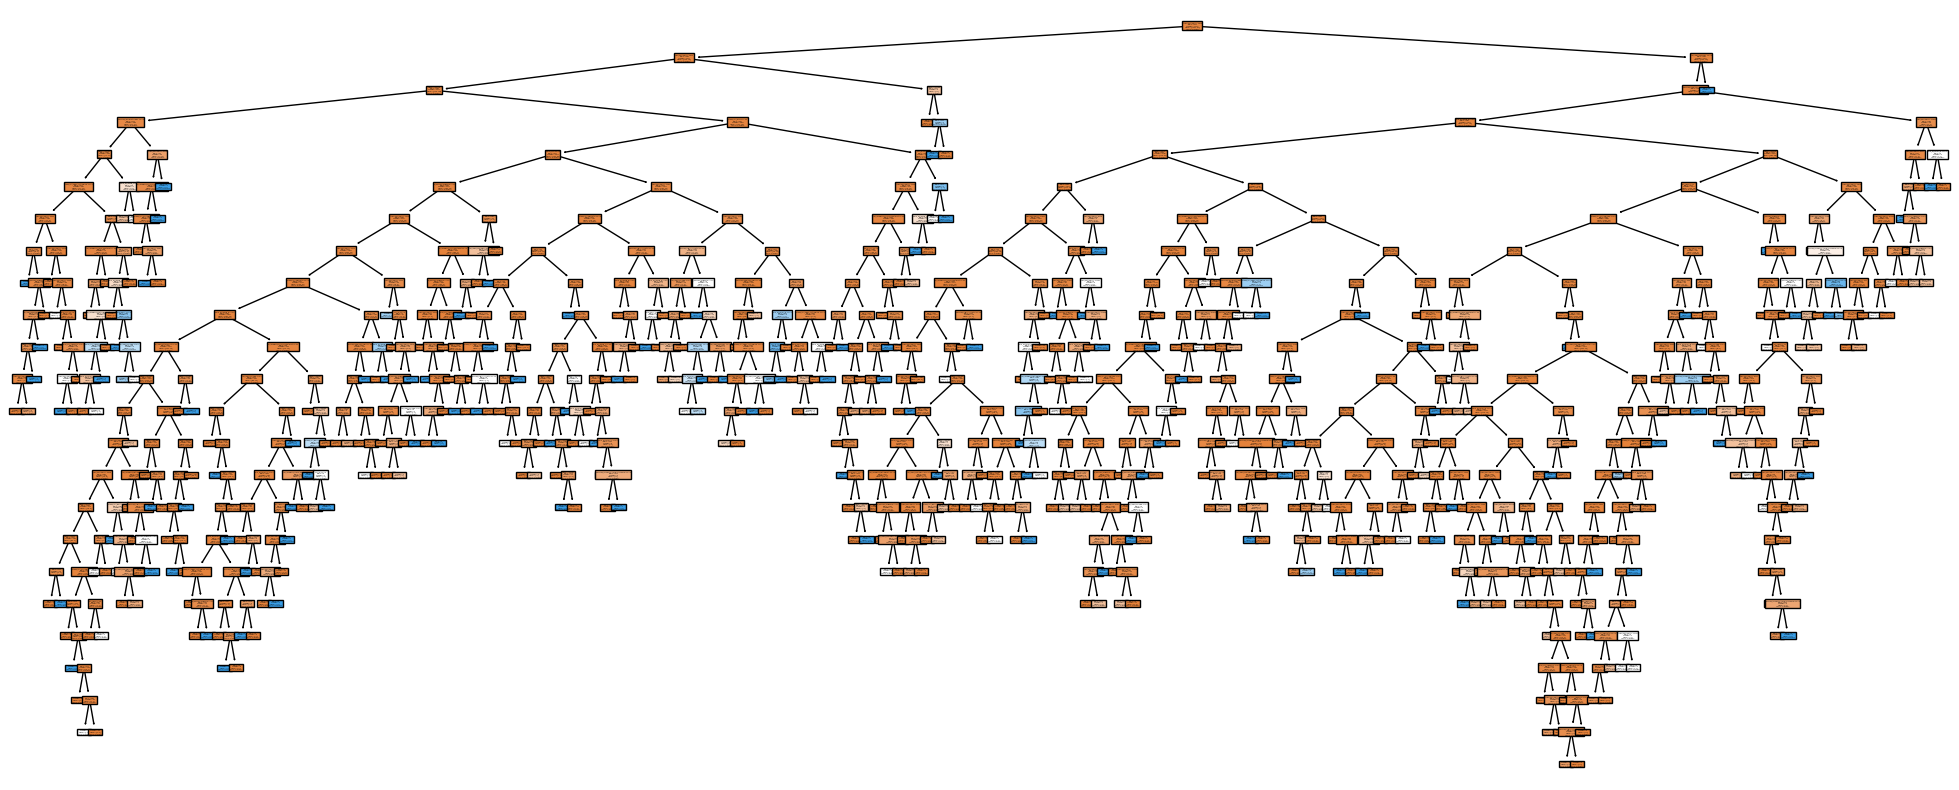

In [11]:
plt.figure(figsize=(25, 10))
plot_tree(clf_encoded,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=feature_names_list)
plt.show()

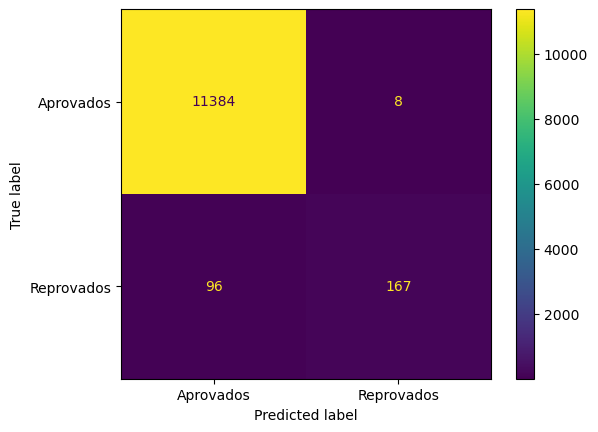

In [12]:
ConfusionMatrixDisplay.from_estimator(clf_encoded, X_train_encoded, y_train_encoded, display_labels=['Aprovados', 'Reprovados'])


In [13]:
y_pred_encoded = clf_encoded.predict(X_train_encoded)
accuracy = accuracy_score(y_train_encoded, y_pred_encoded)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.991076791076791


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [14]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test_encoded,y_test_encoded)

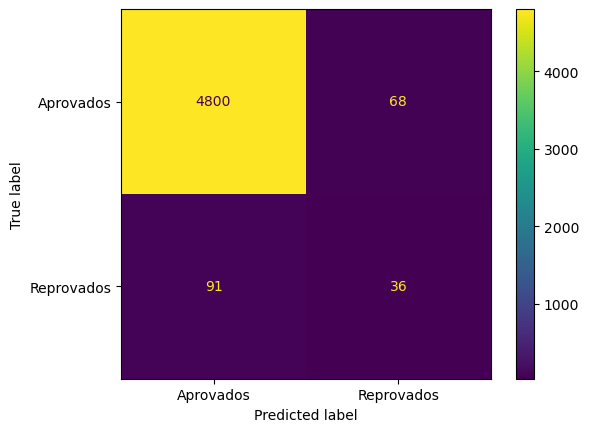

In [15]:
ConfusionMatrixDisplay.from_estimator(clf_encoded, X_test_encoded, y_test_encoded, display_labels=['Aprovados', 'Reprovados'])

In [16]:
predict = clf_encoded.predict(X_test_encoded)
accuracy_score(y_test_encoded, predict)

0.9681681681681682

In [17]:
clf_encoded = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_encoded = clf_encoded.fit(X_train_encoded,y_train_encoded)

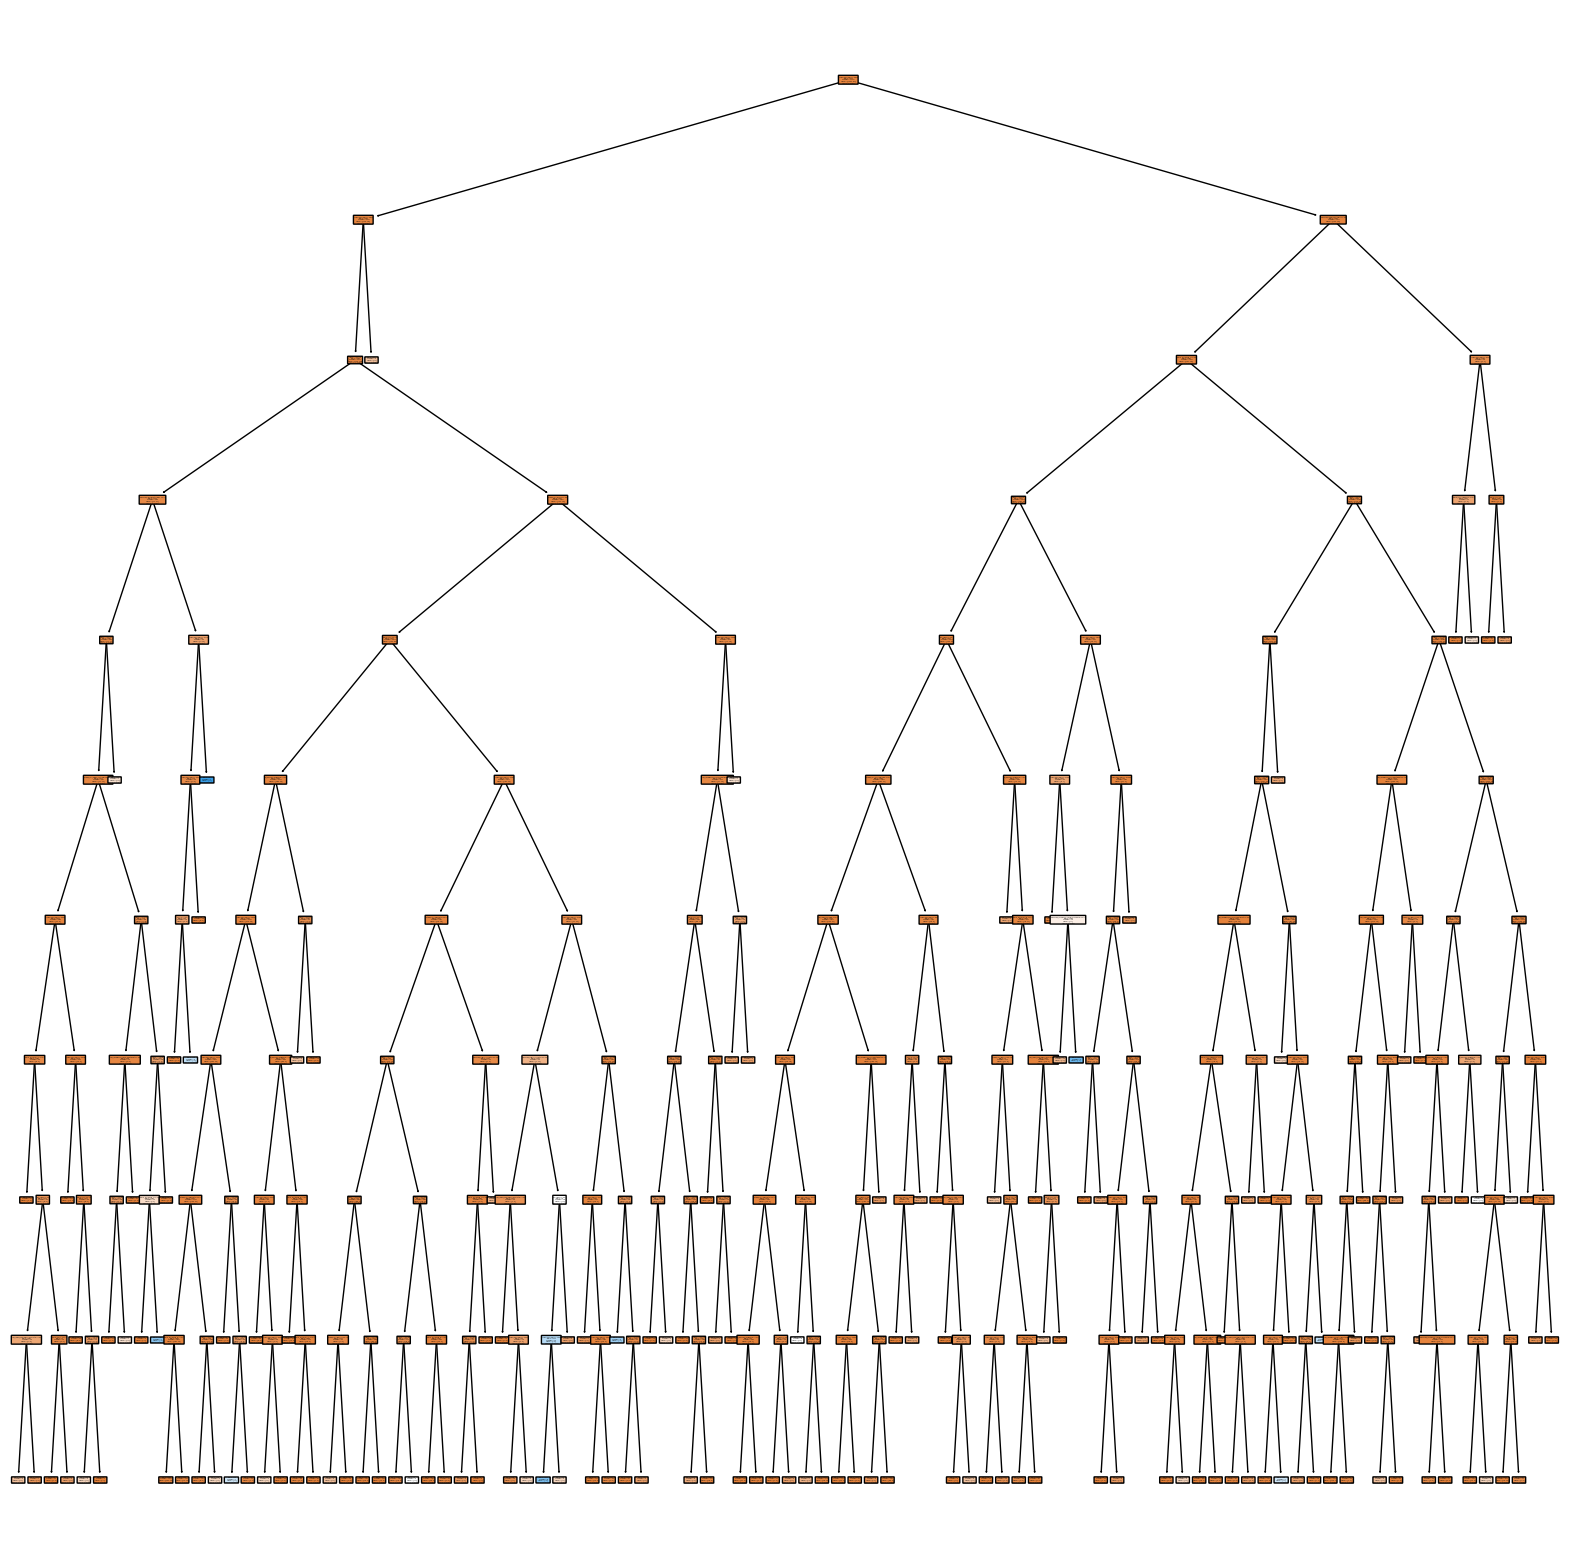

In [18]:
plt.figure(figsize=[20,20])
plot_tree(clf_encoded,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=feature_names_list);

In [19]:
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [20]:
proporcao_aprovados*100

97.91791791791792

In [21]:
proporcao_reprovados*100

2.0820820820820822

In [22]:
df['mau'] = df['mau'].replace(True, False)
df['mau'].value_counts()

mau
False    16650
Name: count, dtype: int64

In [23]:
y = df['mau']

X = df.drop('mau',axis=1)

In [24]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train_encoded,y_train_encoded)

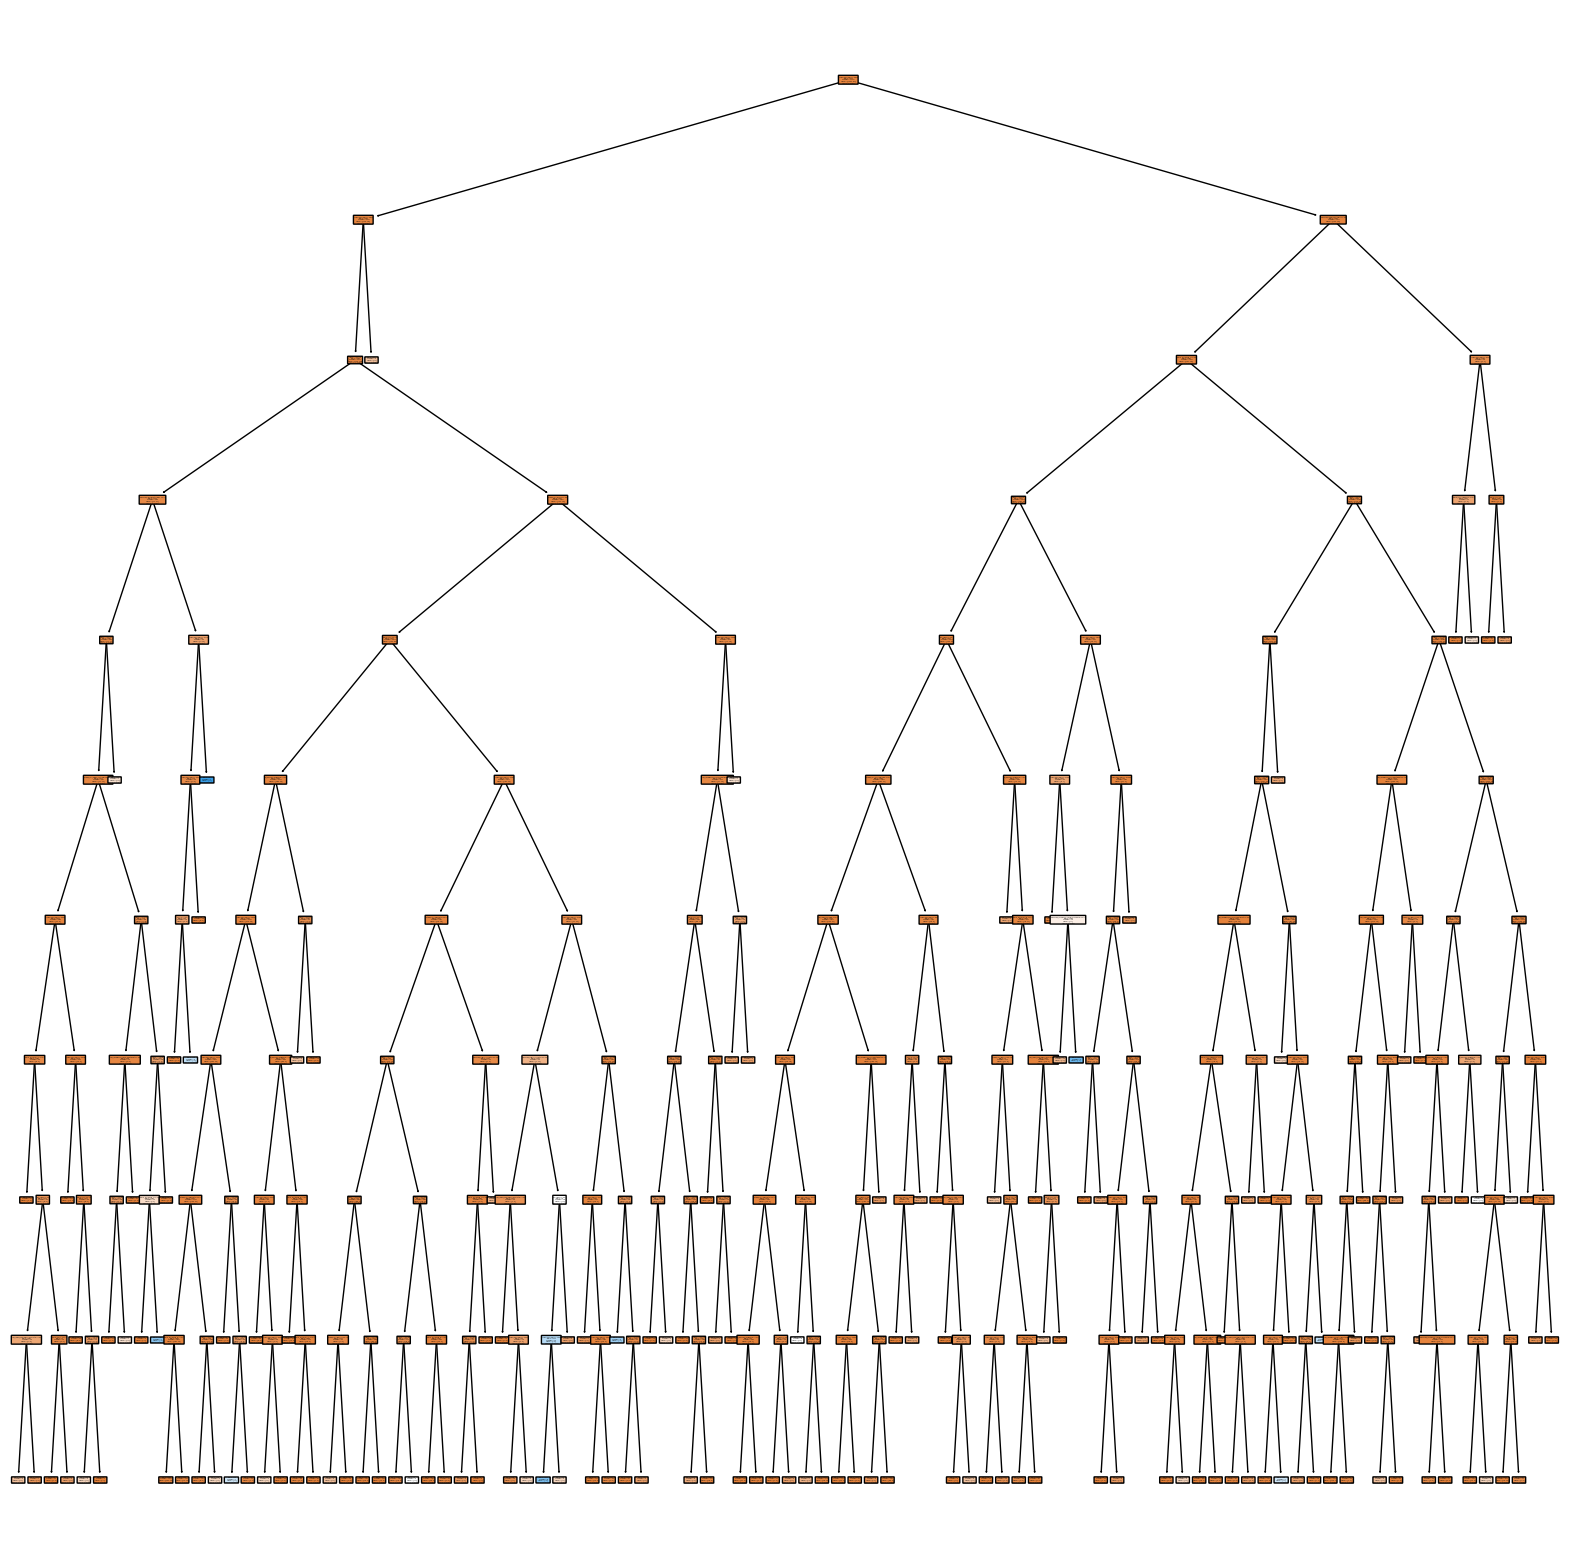

In [25]:
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=feature_names_list);

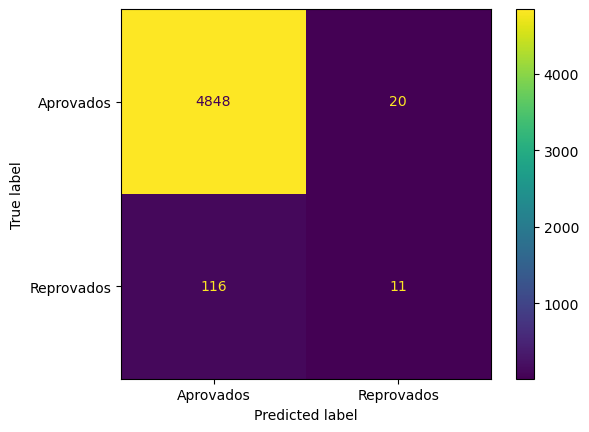

In [26]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_encoded, y_test_encoded, display_labels=['Aprovados', 'Reprovados'])

In [27]:
predict = clf.predict(X_train_encoded)
accuracy_score(y_train_encoded, predict)

0.9794079794079794

In [28]:
predict = clf.predict(X_test_encoded)
accuracy_score(y_test_encoded, predict)

0.9727727727727727

In [29]:
proporcao_aprovados = (predict == 0).sum() / len(predict)
proporcao_reprovados = (predict == 1).sum() / len(predict)

In [30]:
proporcao_aprovados

0.9937937937937938

In [31]:
proporcao_reprovados

0.006206206206206206